# Week 6 Assignment
## Cars Dataset Exploratory Data Analysis

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
# laoding dataset
cars = pd.read_csv('cars_ds_final.csv')
cars.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cars.shape

(1276, 141)

In [4]:
cars.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Unnamed: 0                                 int64  
 1    Make                                       object 
 2    Model                                      object 
 3    Variant                                    object 
 4    Ex-Showroom_Price                          object 
 5    Displacement                               object 
 6    Cylinders                                  float64
 7    Valves_Per_Cylinder                        float64
 8    Drivetrain                                 object 
 9    Cylinder_Configuration                     object 
 10   Emission_Norm                              object 
 11   Engine_Location                            object 
 12   Fuel_System                                object 
 13   Fuel_Tank_Capacity             

In [5]:
# dropping the "unnamed" column
cars.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# converting Ex-Showroom_Price ino numerical data
cars['Ex-Showroom_Price'] = cars['Ex-Showroom_Price'].str.replace('Rs.','').str.replace(',','')

In [7]:
cars['Ex-Showroom_Price'] = cars['Ex-Showroom_Price'].astype(int)

In [8]:
# creating a new column with the combination of columns "Make" and "Model"
cars['Name'] = cars['Make'] +'-'+ cars['Model']

In [9]:
cars.drop(columns=['Make','Model'], axis=1,inplace=True)

## Data Cleaning
Selecting useful columns that are relevant and useful out of the whole 140 columns.


In [10]:
df = cars[['Name','Variant','Ex-Showroom_Price','Displacement','Seating_Capacity','Cylinders','Drivetrain','Emission_Norm','Fuel_System',
           'Fuel_Tank_Capacity','Fuel_Type','Height','Length','Width','Body_Type','City_Mileage','ARAI_Certified_Mileage',
           'Gears','Ground_Clearance','Front_Brakes','Power_Steering','Power_Seats', 'Power','Torque','Speedometer','Odometer','Tripmeter',
           'Seating_Capacity','Type','Wheelbase','Average_Fuel_Consumption','Basic_Warranty',
           'Bluetooth','Number_of_Airbags','USB_Compatibility','Engine_Type','USB_Ports','Battery','Navigation_System']]

In [11]:
df.to_csv('new_car', index=False)

In [12]:
df = pd.read_csv('new_car')

In [13]:
## Removing cc from displacement column
df['Displacement']=df.Displacement.str.replace('cc','')

In [14]:
df.Fuel_Tank_Capacity.value_counts()

Fuel_Tank_Capacity
45 litres      125
35 litres      124
50 litres       94
60 litres       91
37 litres       79
              ... 
36 litres        1
90.5 litres      1
87 litres        1
72 litres        1
96 litres        1
Name: count, Length: 63, dtype: int64

In [15]:
df['Fuel_Tank_Capacity']=df.Fuel_Tank_Capacity.str.replace('litres','')

In [16]:
df.Fuel_Tank_Capacity = df.Fuel_Tank_Capacity.astype(float)

In [17]:
# converting height, length and width into numerical column
df['Height'] = df.Height.str.replace('mm','')

In [18]:
df['Height'].astype(float)

0       1652.0
1       1652.0
2       1652.0
3       1652.0
4       1652.0
         ...  
1271    1495.0
1272    1495.0
1273    1495.0
1274    1495.0
1275    1900.0
Name: Height, Length: 1276, dtype: float64

In [19]:
df['Length'] = df.Length.str.replace('mm','')
df['Length'].astype(float)

df['Width'] = df.Width.str.replace('mm','')
df['Width'].astype(float)

0       1750.0
1       1750.0
2       1750.0
3       1750.0
4       1750.0
         ...  
1271    1695.0
1272    1695.0
1273    1695.0
1274    1695.0
1275    1875.0
Name: Width, Length: 1276, dtype: float64

In [20]:
# Power and Torque
df.Power.value_counts()

Power
83PS@6000rpm           52
75PS@4000rpm           37
90PS@4000rpm           29
100PS@3750RPM          28
68PS@6000rpm           25
                       ..
248bhp@5200rpm          1
268PS@6350rpm           1
258bhp@5800-6100rpm     1
197hp@4500-6500rpm      1
202ps@3800rpm           1
Name: count, Length: 372, dtype: int64

In [21]:
df.Torque.value_counts()

Torque
90Nm@3500rpm          42
200Nm@1750rpm         42
114Nm@4000rpm         27
350Nm@1750-2500rpm    26
104Nm@4000rpm         22
                      ..
280Nm@1350-4600rpm     1
400 Nm @ 1750 RPM      1
400NM@1550rpm          1
420Nm@1500-3000rpm     1
441Nm@2000rpm          1
Name: count, Length: 342, dtype: int64

In [22]:
## Removing unneccesary things using REGEX
df.Power = df['Power'].str.extract(r'(\d{1,4}).*').astype(int)

In [23]:
df.Torque = df['Torque'].str.extract(r'(\d{1,4}).*').astype(float)

In [24]:
df.Ground_Clearance = df['Ground_Clearance'].str.replace('mm','').astype(float)

For missing values, I will be using median for numerical column and mode for categorical column.

In [27]:
# Seperating cols into nnumerical and categorical
numerical_col = df.select_dtypes(include=['float64','int64','int32']).columns
categorical_col = df.select_dtypes(include=['object']).columns

In [28]:
num = SimpleImputer(strategy='median')
cat = SimpleImputer(strategy='most_frequent')

In [29]:
df[numerical_col] = num.fit_transform(df[numerical_col])
df[categorical_col] = cat.fit_transform(df[categorical_col])

In [30]:
df.isna().sum()

Name                        0
Variant                     0
Ex-Showroom_Price           0
Displacement                0
Seating_Capacity            0
Cylinders                   0
Drivetrain                  0
Emission_Norm               0
Fuel_System                 0
Fuel_Tank_Capacity          0
Fuel_Type                   0
Height                      0
Length                      0
Width                       0
Body_Type                   0
City_Mileage                0
ARAI_Certified_Mileage      0
Gears                       0
Ground_Clearance            0
Front_Brakes                0
Power_Steering              0
Power_Seats                 0
Power                       0
Torque                      0
Speedometer                 0
Odometer                    0
Tripmeter                   0
Seating_Capacity.1          0
Type                        0
Wheelbase                   0
Average_Fuel_Consumption    0
Basic_Warranty              0
Bluetooth                   0
Number_of_

# Data Visualization
### Univariate Analysis

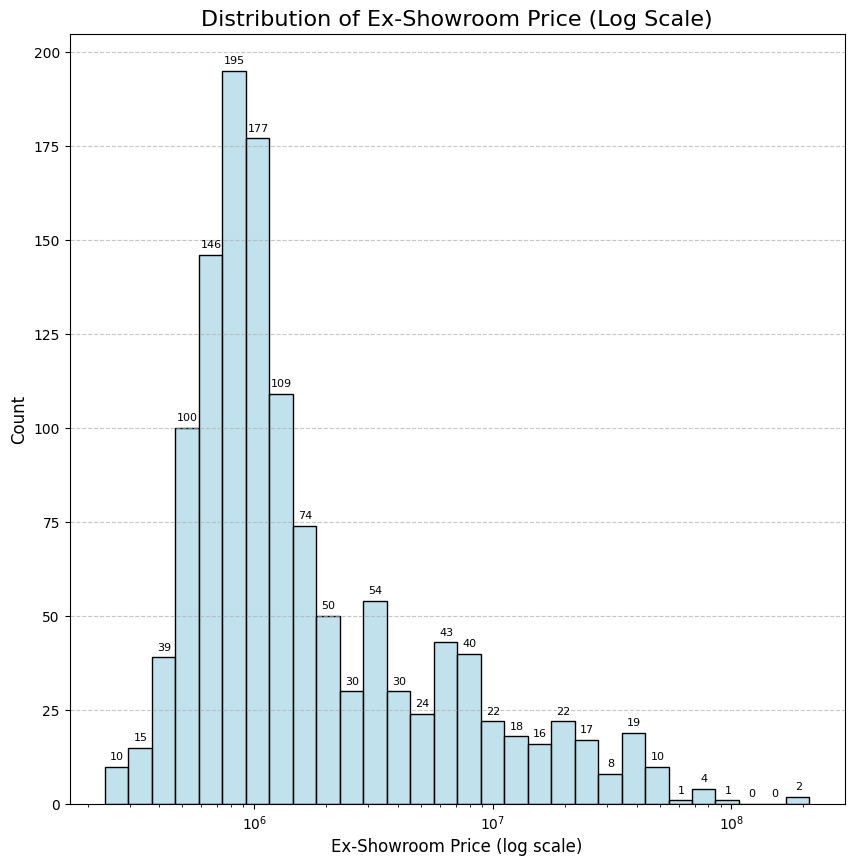

In [31]:
# barchart showing count of Ex Showroom Price
# Create a figure and axes
plt.figure(figsize=(10, 10))
ax = sns.histplot(data=df, x='Ex-Showroom_Price', log_scale=True, color='lightblue', bins=30)

# Adding labels and title
plt.title('Distribution of Ex-Showroom Price (Log Scale)', fontsize=16)
plt.xlabel('Ex-Showroom Price (log scale)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding numbers above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.show()

C:\Users\vicky\AppData\Local\Temp\ipykernel_13732\794346096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Fuel_Type', palette='viridis')  # Adjust the color palette as needed


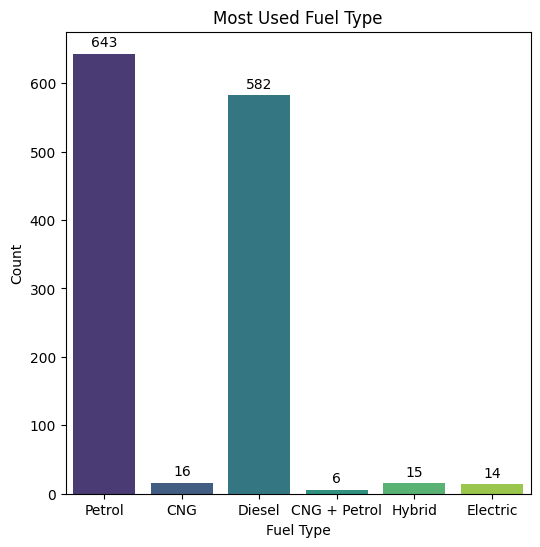

In [32]:
# most used Fuel type
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='Fuel_Type', palette='viridis')  # Adjust the color palette as needed

# Adding labels
plt.title('Most Used Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Adding numbers above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [33]:
maker = df.Name.value_counts().head(10)
maker

Name
Tata-Nexon              99
Mahindra-Kuv100 Nxt     22
Jeep-Compass            21
Mahindra-Xuv500         21
Honda-Amaze             20
Hyundai-Creta           18
Kia-Seltos              16
Toyota-Innova Crysta    16
Maruti Suzuki-Swift     14
Maruti Suzuki-Ciaz      14
Name: count, dtype: int64

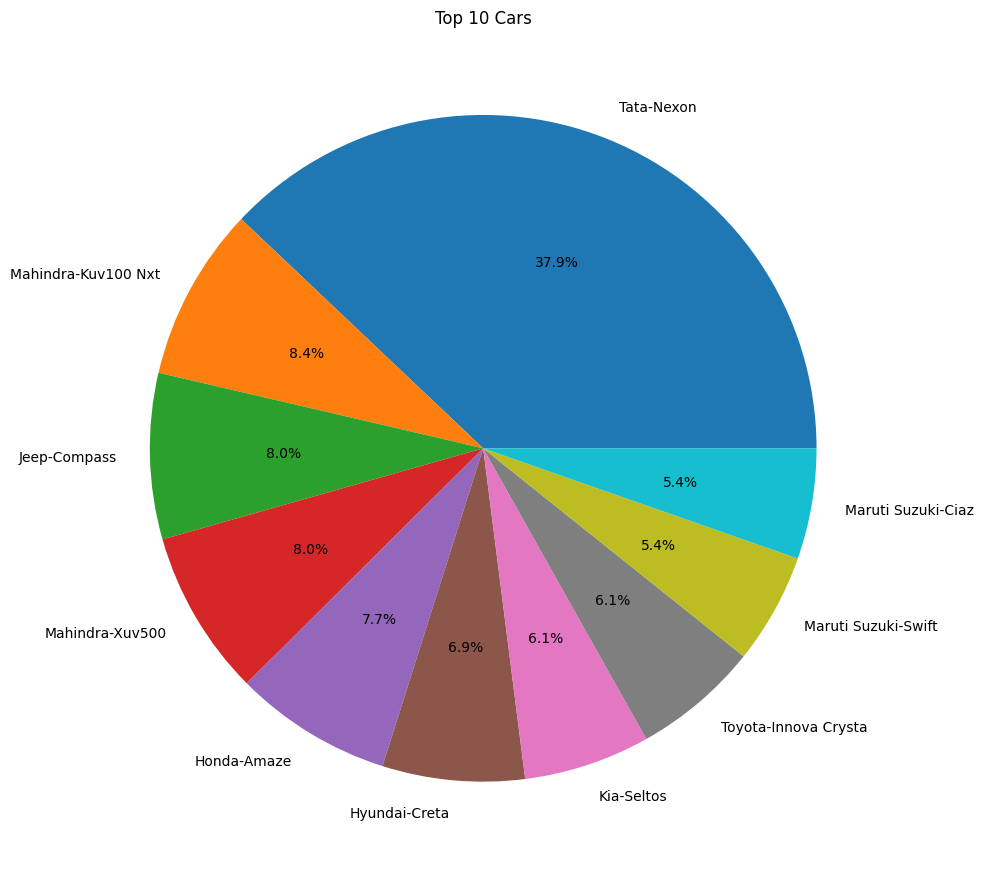

In [34]:
# pie chart showing top 10 cars by percentage
plt.figure(figsize=(10,10))
plt.pie(x=maker,labels=['Tata-Nexon','Mahindra-Kuv100 Nxt','Jeep-Compass','Mahindra-Xuv500',
'Honda-Amaze','Hyundai-Creta','Kia-Seltos','Toyota-Innova Crysta','Maruti Suzuki-Swift','Maruti Suzuki-Ciaz'],autopct='%1.1f%%')
plt.title('Top 10 Cars')
plt.tight_layout()

C:\Users\vicky\AppData\Local\Temp\ipykernel_13732\1944459109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Number_of_Airbags'], palette='viridis')  # Adjust the color palette as needed


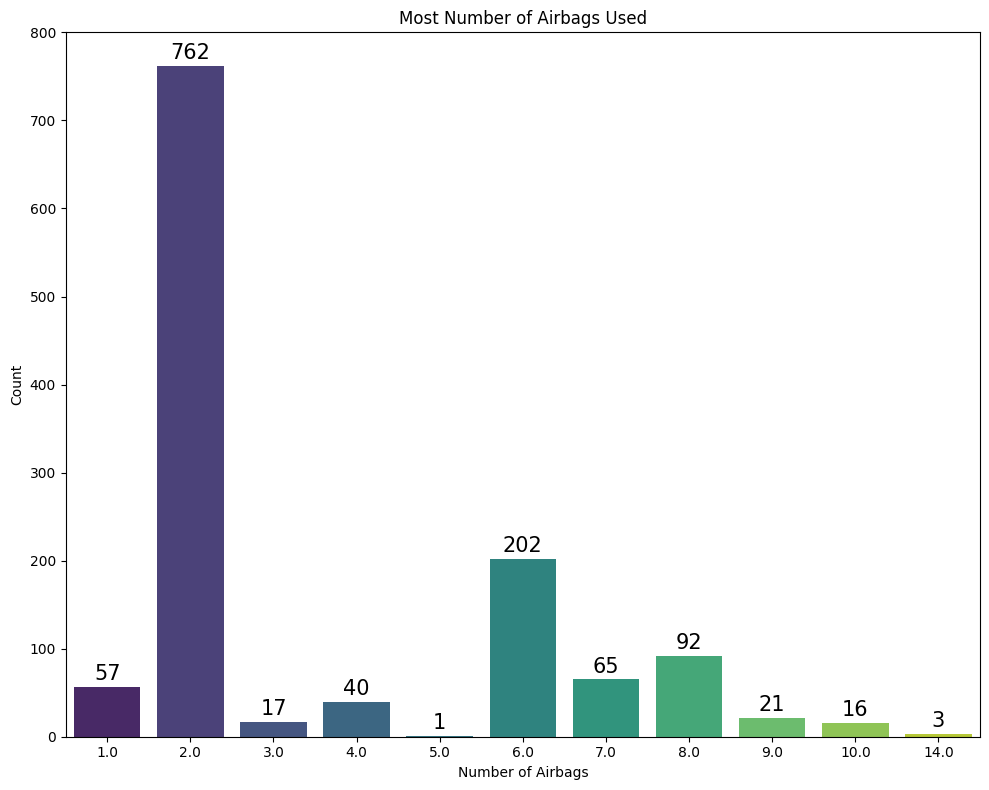

In [35]:
# bar chart showing most used number of airbags
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df['Number_of_Airbags'], palette='viridis')  # Adjust the color palette as needed

# Adding labels and title
plt.title('Most Number of Airbags Used')
plt.xlabel('Number of Airbags')
plt.ylabel('Count')

# Adding numbers above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=15, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [36]:
power = df.Power.value_counts().head(10)
power_label = df.Power.value_counts().head(10).index
torque = df.Torque.value_counts().head(10)
torque_label = df.Torque.value_counts().head(10).index

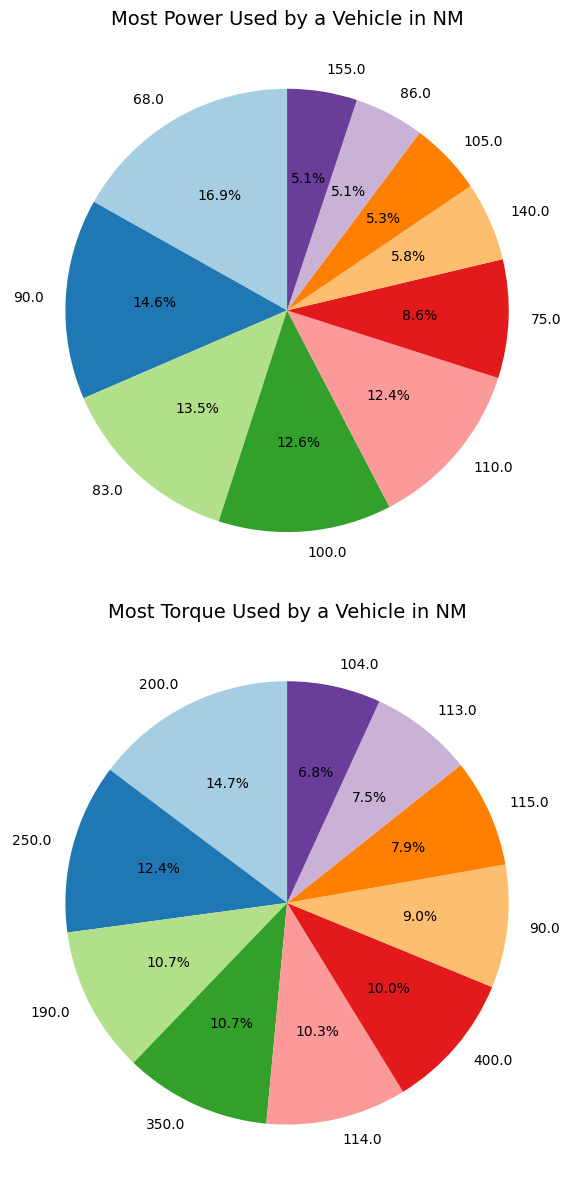

In [37]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot the first pie chart (Power)
axes[0].pie(x=power, labels=power_label, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Most Power Used by a Vehicle in NM', fontsize=14)

# Plot the second pie chart (Torque)
axes[1].pie(x=torque, labels=torque_label, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Most Torque Used by a Vehicle in NM', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Bivariate Analysis

In [38]:
corr = df.corr(numeric_only = True)

In [39]:
corr

,Ex-Showroom_Price,Seating_Capacity,Cylinders,Fuel_Tank_Capacity,Ground_Clearance,Power,Torque,Seating_Capacity.1,Number_of_Airbags,USB_Ports
Ex-Showroom_Price,1.000000,-0.307150,0.817001,0.454805,-0.032621,0.855172,0.702153,-0.307150,0.335710,-0.209113
Seating_Capacity,-0.307150,1.000000,-0.313152,0.029613,0.257605,-0.326305,-0.141714,1.000000,-0.043493,0.072918
Cylinders,0.817001,-0.313152,1.000000,0.637512,-0.021425,0.880504,0.764419,-0.313152,0.448188,-0.089052
Fuel_Tank_Capacity,0.454805,0.029613,0.637512,1.000000,0.122058,0.662256,0.726607,0.029613,0.634343,0.041416
Ground_Clearance,-0.032621,0.257605,-0.021425,0.122058,1.000000,-0.020029,0.077282,0.257605,0.081411,0.010248
Power,0.855172,-0.326305,0.880504,0.662256,-0.020029,1.000000,0.854995,-0.326305,0.534421,-0.140767
Torque,0.702153,-0.141714,0.764419,0.726607,0.077282,0.854995,1.000000,-0.141714,0.600943,-0.062385
Seating_Capacity.1,-0.307150,1.000000,-0.313152,0.029613,0.257605,-0.326305,-0.141714,1.000000,-0.043493,0.072918
Number_of_Airbags,0.335710,-0.043493,0.448188,0.634343,0.081411,0.534421,0.600943,-0.043493,1.000000,0.042070
USB_Ports,-0.209113,0.072918,-0.089052,0.041416,0.010248,-0.140767,-0.062385,0.072918,0.042070,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

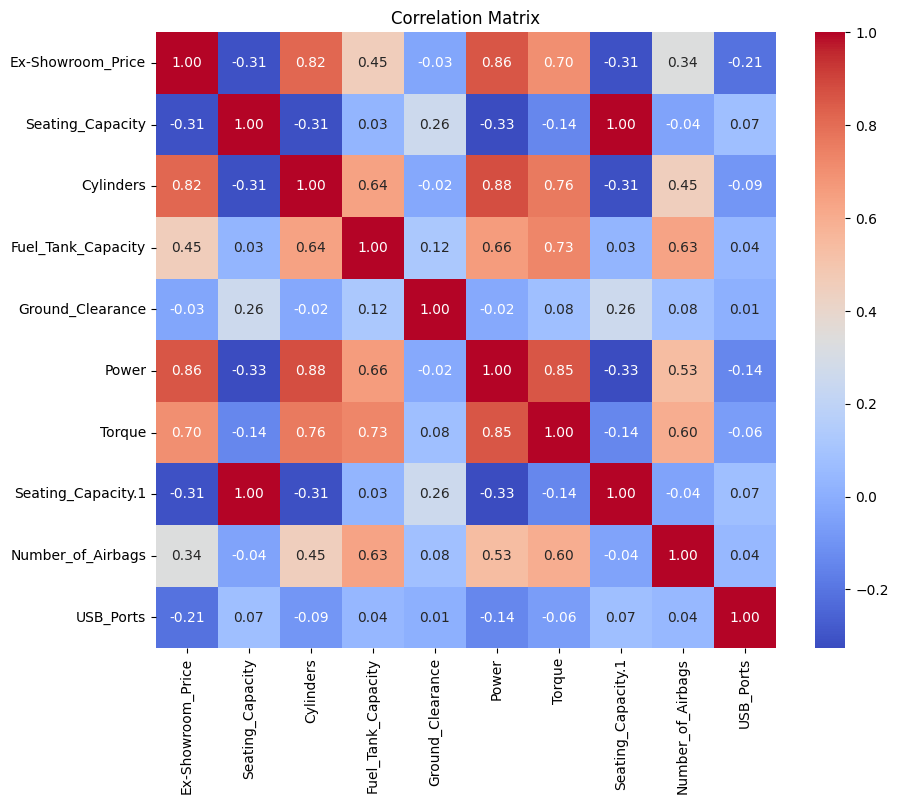

In [40]:
# correlation heatmap showing positive and negative relationship among numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

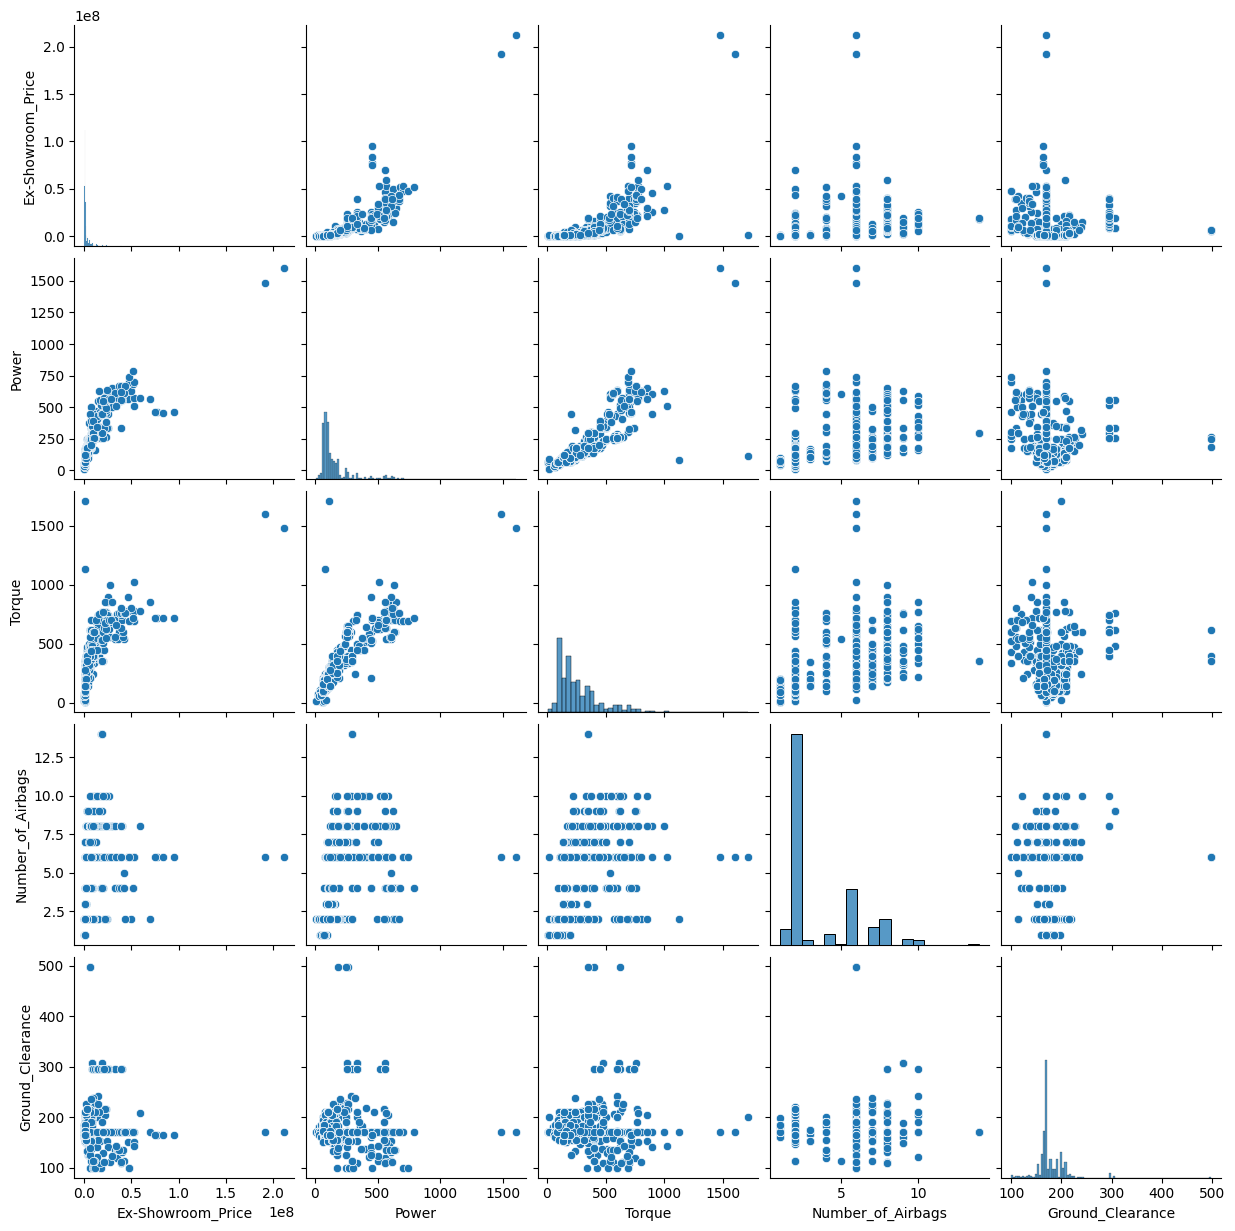

In [41]:
sns.pairplot(data=df[['Ex-Showroom_Price','Power','Torque','Number_of_Airbags','Ground_Clearance']])

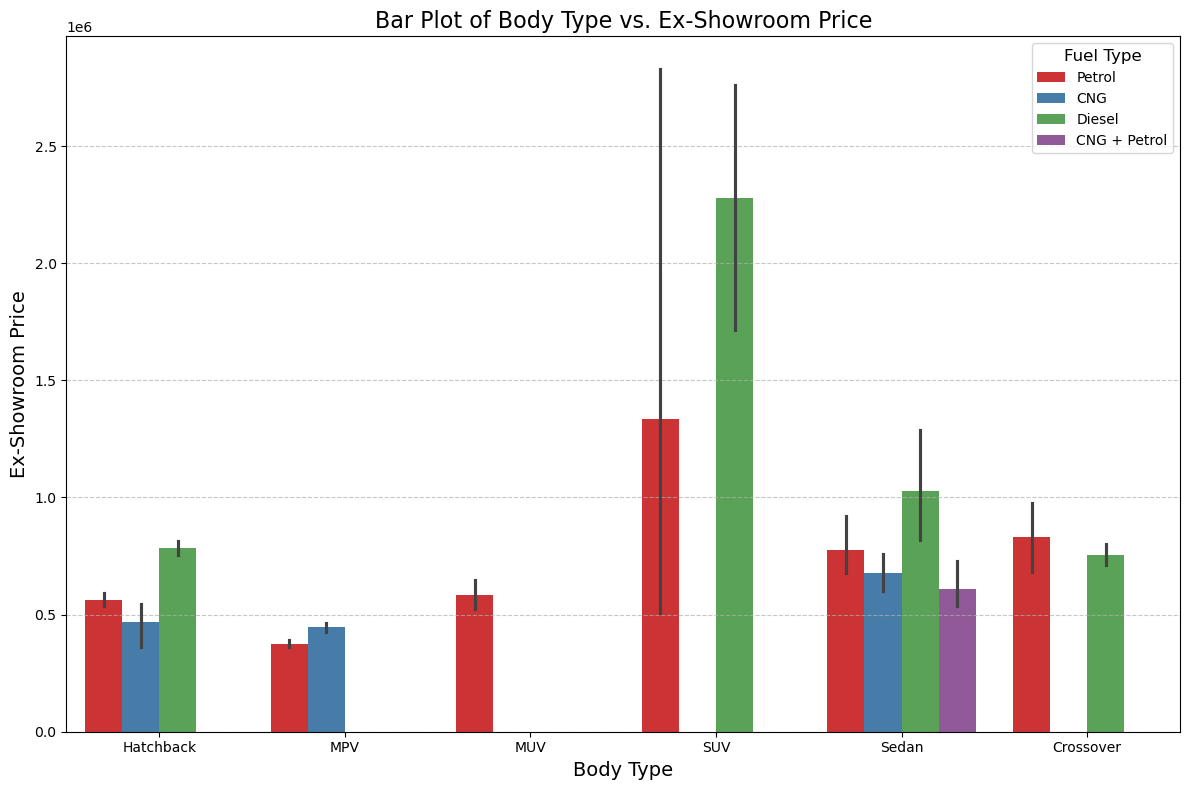

In [66]:
plt.figure(figsize=(12, 8))

# Specify dodge=True to ensure bars are not stacked
sns.barplot(data=df.head(250), x='Body_Type', y='Ex-Showroom_Price', hue='Fuel_Type', palette='Set1', dodge=True)

# Adding labels and title
plt.title('Bar Plot of Body Type vs. Ex-Showroom Price', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Ex-Showroom Price', fontsize=14)

# Adding legend
plt.legend(title='Fuel Type', title_fontsize='12', fontsize='10', loc='upper right')

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\debar\AppData\Local\Temp\ipykernel_8284\1506642653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cylinders', y='Ex-Showroom_Price', data=df, palette='husl')


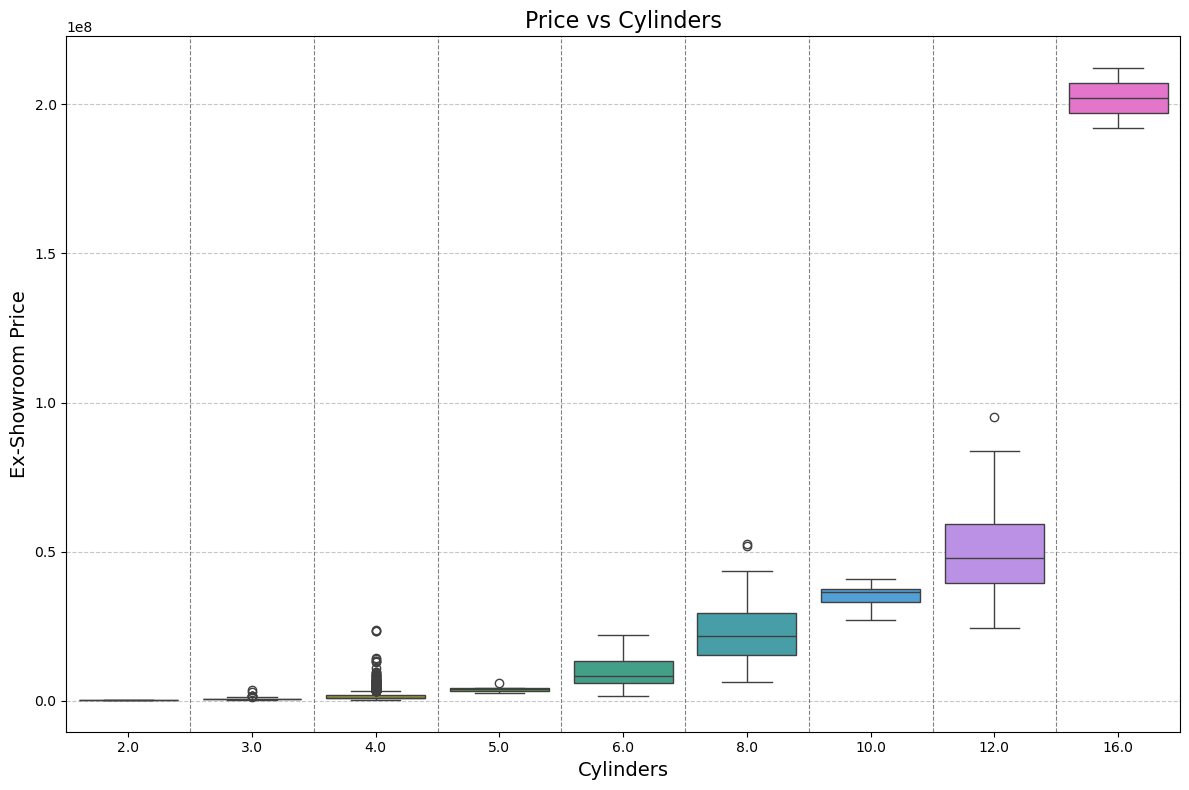

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cylinders', y='Ex-Showroom_Price', data=df, palette='husl')

# Adding labels and title
plt.title('Price vs Cylinders', fontsize=16)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('Ex-Showroom Price', fontsize=14)

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding horizontal lines for quartiles
for i in range(1, len(df['Cylinders'].unique()) + 1):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()